In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
#import seaborn.objects as so

In [2]:
%matplotlib inline
sns.set_palette("colorblind")

In [3]:
df = pd.read_csv('drive/MyDrive/US_Accidents_Dec20_updated.csv')

# Прогнозирование вляния аварии на трафик 

## Описание данных

Это набор данных об автомобильных авариях в 49 штатах США. Данные об авариях собираются с февраля 2016 г. по декабрь 2020 г. с использованием нескольких API, которые предоставляют потоковые данные о дорожно-транспортных происшествиях (или событиях). В настоящее время в этом наборе данных содержится около 1,5 миллиона записей об авариях.

Страница датасета на Kaggle: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents/versions/10

Столбцы:

 * `ID` &mdash; уникальный идентификатор записи об аварии.
 * `Severity` &mdash; тяжесть аварии, число от 1 до 4, где 1 указывает на наименьшее влияние на движение (т. е. короткая задержка в результате аварии), а 4 указывает на значительное влияние на движение (т. е. длительное опоздание). Серьезность, о которой сообщают разные источники, может различаться.
 * `Start_Time` &mdash; время начала аварии в местном часовом поясе. 
 * `End_Time` &mdash; время окончания аварии в местном часовом поясе. Подразумевается время, когда влияние аварии на транспортный поток было устранено. 
 * `Start_Lat` &mdash; широта начальной точки (GPS-координаты). 
 * `Start_Lng` &mdash; долгота начальной точки (GPS-координаты). 
 * `End_Lat` &mdash; широта конечной точки (GPS-координаты). 
 * `End_Lng` &mdash; долгота конечной точки (GPS-координаты). 
 * `Distance(mi)` &mdash; протяженность участка дороги, затронутого аварией в милях. 
 * `Description` &mdash; описание аварии на естественном языке. 
 * `Number` &mdash; номер улицы в записи адреса. 
 * `Street` &mdash; название улицы в записи адреса. 
 * `Side` &mdash; относительная сторона улицы (лево/право) в записи адреса. 
 * `City` &mdash; город в записи адреса. 
 * `County` &mdash; округ в адресной записи. 
 * `State` &mdash; состояние в адресной записи.
 * `Zipcode` &mdash; почтовый индекс в адресной записи. 
 * `Country` &mdash; страна в адресной записи. 
 * `Timezone` &mdash; часовой пояс в зависимости от места аварии (восточный, центральный и т. д.). 
 * `Airport_Code` &mdash; метеостанция в аэропорту, ближайшая к месту аварии.
 * `Weather_Timestamp` &mdash; отметка времени записи наблюдения за погодой (по местному времени).
 * `Temperature(F)` &mdash; температура (в Фаренгейтах). 
 * `Wind_Chill(F)` &mdash; ветро-холодовой индекс (в Фаренгейтах). 
 * `Humidity(%)` &mdash; влажность (в процентах). 
 * `Pressure(in)` &mdash; давление воздуха (в дюймах ртутного столба).
 * `Visibility(mi)` &mdash; видимость (в милях). 
 * `Wind_Direction` &mdash; направление ветра. 
 * `Wind_Speed(mph)` &mdash; скорость ветра (в милях в час). 
 * `Precipitation(in)` &mdash; количество осадков в дюймах, если они есть.
 * `Weather_Condition` &mdash; погодные условия (дождь, снег, гроза, туман и т.д.)
 * `Amenity` &mdash; [аннотация POI](https://ru.wikipedia.org/wiki/POI), указывающая на наличие удобств в близлежащем месте.
 * `Bump` &mdash; [аннотация POI](https://ru.wikipedia.org/wiki/POI), указывающая на наличие лежачего полицейского или полицейской неровности поблизости. 
 * `Crossing` &mdash; [аннотация POI](https://ru.wikipedia.org/wiki/POI), указывающая на наличие перекрестка в близлежащем месте.
 * `Give_Way` &mdash; A POI annotation which indicates presence of give_way in a nearby location. 
 * `Junction` &mdash; [аннотация POI](https://ru.wikipedia.org/wiki/POI), указывающая на наличие перекрестка в соседнем месте.
 * `No_Exit` &mdash; [аннотация POI](https://ru.wikipedia.org/wiki/POI), указывающая на наличие перекрестка в соседнем месте.
 * `Railway` &mdash; [аннотация POI](https://ru.wikipedia.org/wiki/POI), указывающая на наличие поблизости железной дороги.
 * `Roundabout` &mdash; [аннотация POI](https://ru.wikipedia.org/wiki/POI),  указывающая на наличие кольцевой развязки поблизости.
 * `Station` &mdash; [аннотация POI](https://ru.wikipedia.org/wiki/POI), указывающая на присутствие станции поблизости.
 * `Stop` &mdash; [аннотация POI](https://ru.wikipedia.org/wiki/POI), указывающая на наличие остановки поблизости.
 * `Traffic_Calming` &mdash; [аннотация POI](https://ru.wikipedia.org/wiki/POI), указывающая на присутствие traffic_calming поблизости. 
 * `Traffic_Signal` &mdash; [аннотация POI](https://ru.wikipedia.org/wiki/POI), указывающая на присутствие traffic_signal поблизости. 
 * `Turning_Loop` &mdash; [аннотация POI](https://ru.wikipedia.org/wiki/POI), указывающая на присутствие Turning_loop в близлежащем месте. 
 * `Sunrise_Sunset` &mdash; период дня (т. е. день или ночь) в зависимости от восхода/захода солнца. 
 * `Civil_Twilight` &mdash; период дня (т. е. день или ночь) в зависимости от гражданских сумерек. 
 * `Nautical_Twilight` &mdash; период дня (т. е. день или ночь) в зависимости от морских сумерек.
 * `Astronomical_Twilight` &mdash; период дня (т. е. день или ночь) на основе астрономических сумерек.


## Поставновка задачи

Требуется предсказать тяжесть аварии (Severity) по шкале от 1 до 4, где 1 указывает на наименьшее влияние на движение (т. е. короткая задержка в результате аварии), а 4 указывает на значительное влияние на движение (т. е. длительное опоздание) по остальным признакам датасета (кроме ID).

In [4]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day


In [5]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [6]:
df.dtypes

ID                        object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity   

In [7]:
for col in df.columns:
  count_nulls = df[col].isnull().sum()
  print("{name:s} содержит {cnt:d} пустых записей".format(name=col, cnt=count_nulls))

ID содержит 0 пустых записей
Severity содержит 0 пустых записей
Start_Time содержит 0 пустых записей
End_Time содержит 0 пустых записей
Start_Lat содержит 0 пустых записей
Start_Lng содержит 0 пустых записей
End_Lat содержит 0 пустых записей
End_Lng содержит 0 пустых записей
Distance(mi) содержит 0 пустых записей
Description содержит 0 пустых записей
Number содержит 1046095 пустых записей
Street содержит 0 пустых записей
Side содержит 0 пустых записей
City содержит 83 пустых записей
County содержит 0 пустых записей
State содержит 0 пустых записей
Zipcode содержит 935 пустых записей
Country содержит 0 пустых записей
Timezone содержит 2302 пустых записей
Airport_Code содержит 4248 пустых записей
Weather_Timestamp содержит 30264 пустых записей
Temperature(F) содержит 43033 пустых записей
Wind_Chill(F) содержит 449316 пустых записей
Humidity(%) содержит 45509 пустых записей
Pressure(in) содержит 36274 пустых записей
Visibility(mi) содержит 44211 пустых записей
Wind_Direction содержит 41858

In [8]:
# Уникальные значения

print("Уникальные значения")
for col in df.columns:
  print(col, df[col].nunique())

Уникальные значения
ID 1516064
Severity 4
Start_Time 1037092
End_Time 1161415
Start_Lat 590611
Start_Lng 603369
End_Lat 587824
End_Lng 599916
Distance(mi) 11514
Description 527655
Number 37592
Street 93048
Side 2
City 10657
County 1671
State 49
Zipcode 177196
Country 1
Timezone 4
Airport_Code 1985
Weather_Timestamp 331748
Temperature(F) 775
Wind_Chill(F) 883
Humidity(%) 100
Pressure(in) 1007
Visibility(mi) 74
Wind_Direction 24
Wind_Speed(mph) 121
Precipitation(in) 187
Weather_Condition 116
Amenity 2
Bump 2
Crossing 2
Give_Way 2
Junction 2
No_Exit 2
Railway 2
Roundabout 2
Station 2
Stop 2
Traffic_Calming 2
Traffic_Signal 2
Turning_Loop 1
Sunrise_Sunset 2
Civil_Twilight 2
Nautical_Twilight 2
Astronomical_Twilight 2


Поле `ID` додержит все уникальные значения. Поля `Country` и `Turning_Loop` содержат константные значения. Поля `ID`, `Country`, `Turning_Loop` будут удалены.

In [9]:
df = df.drop(['ID', 'Country', 'Turning_Loop'], axis=1)
df.shape

(1516064, 44)

Также сразу можно обратить внимание, что `Distance(mi)`, `End_Time`, `Duration`, `End_Lat` и `End_Lng`, `Description` могут быть собраны в конце аварии и их можно исключить, т.к. по ним нельзя предсказать `Severity` аварии.

In [10]:
df = df.drop(['Distance(mi)', 'End_Time', 'End_Lat', 'End_Lng', 'Description'], axis=1)
df.shape

(1516064, 39)

Для обработки пропущенных значений для начала получим список столбцов и процент пропущенных значений в них.

In [11]:
missing = pd.DataFrame(df.isnull().sum()).reset_index()
missing.columns = ['Feature', 'Missing_Percent(%)']
missing['Missing_Percent(%)'] = missing['Missing_Percent(%)'].apply(lambda x: x / df.shape[0] * 100)
missing.loc[missing['Missing_Percent(%)']>0,:]

,Feature,Missing_Percent(%)
4,Number,69.000715
7,City,0.005475
10,Zipcode,0.061673
11,Timezone,0.151841
12,Airport_Code,0.280199
13,Weather_Timestamp,1.996222
14,Temperature(F),2.838469
15,Wind_Chill(F),29.637007
16,Humidity(%),3.001786
17,Pressure(in),2.392643


Лидеры по количеству пропусков `Number`, `Precipitation(in)` и `Wind_Chill(F)`. Номер улицы `Number` смело можно удалять, т.к. поле `Street` дублирует его и не содержит пропусков. 

In [12]:
df = df.drop(['Number'], axis=1)
df.shape

(1516064, 38)

Для признаков `Precipitation(in)` и `Wind_Chill(F)` заполним медианным значением.

In [13]:
df['Precipitation(in)'] = df['Precipitation(in)'].fillna(df['Precipitation(in)'].median())
df['Wind_Chill(F)'] = df['Wind_Chill(F)'].fillna(df['Wind_Chill(F)'].median())

При просмотре данных в Excel видно, что там, где не заполнено поле `City`, не заполняются `Sunrise_Sunset` (восход/рассвет), и сумерки: `Civil_Twilight`, `Nautical_Twilight`, `Astronomical_Twilight`. Так как данных с пропущенными сумерками очень мало, по сравнению с размером датасета, такие записи можно удалить.

In [14]:
df = df.dropna(subset=['City', 'Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'])
df.shape

(1515981, 38)

При пропущенном `Zipcode` отсутствуют `Timezone`, `Airport_Code`, `Weather_Timestamp`, `Temperature(F)`, `Wind_Chill(F)`, `Humidity(%)`, `Pressure(in)`, `Visibility(mi)`, `Wind_Direction`, `Wind_Speed(mph)`, `Precipitation(in)`, `Weather_Condition`. Поэтому такие записи тоже удаляем в виду того, что их 0,06% от числа всех записей датасета. 

In [15]:
df[df['Zipcode'].isnull()][['Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition']]

,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition
1128,NaN,NaN,NaN,NaN,57.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1424,NaN,NaN,NaN,NaN,57.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2276,NaN,NaN,NaN,NaN,57.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2642,NaN,NaN,NaN,NaN,57.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4605,NaN,NaN,NaN,NaN,57.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1509745,NaN,NaN,NaN,NaN,57.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1511401,NaN,NaN,NaN,NaN,57.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1511723,NaN,NaN,NaN,NaN,57.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1511724,NaN,NaN,NaN,NaN,57.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [16]:
df = df.dropna(subset=['Zipcode'])
df.shape

(1515046, 38)

Проверим пропущенные значения теперь:

In [17]:
missing = pd.DataFrame(df.isnull().sum()).reset_index()
missing.columns = ['Feature', 'Missing_Percent(%)']
missing['Missing_Percent(%)'] = missing['Missing_Percent(%)'].apply(lambda x: x / df.shape[0] * 100)
missing.loc[missing['Missing_Percent(%)']>0,:]

,Feature,Missing_Percent(%)
10,Timezone,0.090228
11,Airport_Code,0.218673
12,Weather_Timestamp,1.935783
13,Temperature(F),2.778463
15,Humidity(%),2.941891
16,Pressure(in),2.332272
17,Visibility(mi),2.856085
18,Wind_Direction,2.701040
19,Wind_Speed(mph),8.443110
21,Weather_Condition,2.842554


При пропоущенных `Timezone` отсутствуют и все остальные поля, которые сейчас пустые. Удаляем строки с пустым `Timezone`.

In [18]:
df[df['Timezone'].isnull()][['Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Weather_Condition']]

,Airport_Code,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition
34174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1515008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1515532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1515548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1515920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df = df.dropna(subset=['Timezone'])
df.shape

(1513679, 38)

In [20]:
missing = pd.DataFrame(df.isnull().sum()).reset_index()
missing.columns = ['Feature', 'Missing_Percent(%)']
missing['Missing_Percent(%)'] = missing['Missing_Percent(%)'].apply(lambda x: x / df.shape[0] * 100)
missing.loc[missing['Missing_Percent(%)']>0,:]

,Feature,Missing_Percent(%)
11,Airport_Code,0.128561
12,Weather_Timestamp,1.847221
13,Temperature(F),2.690663
15,Humidity(%),2.854238
16,Pressure(in),2.244069
17,Visibility(mi),2.768354
18,Wind_Direction,2.613170
19,Wind_Speed(mph),8.360425
21,Weather_Condition,2.754811


In [21]:
df[df['Airport_Code'].isnull()][['Weather_Timestamp', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Weather_Condition']]

,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition
33969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1511117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1511118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1511485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1513049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df = df.dropna(subset=['Airport_Code'])
df.shape

(1511733, 38)

In [23]:
missing = pd.DataFrame(df.isnull().sum()).reset_index()
missing.columns = ['Feature', 'Missing_Percent(%)']
missing['Missing_Percent(%)'] = missing['Missing_Percent(%)'].apply(lambda x: x / df.shape[0] * 100)
missing.loc[missing['Missing_Percent(%)']>0,:]

,Feature,Missing_Percent(%)
12,Weather_Timestamp,1.720873
13,Temperature(F),2.565400
15,Humidity(%),2.729186
16,Pressure(in),2.118231
17,Visibility(mi),2.643192
18,Wind_Direction,2.487807
19,Wind_Speed(mph),8.242461
21,Weather_Condition,2.629631


In [24]:
df[df['Weather_Timestamp'].isnull()][['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Weather_Condition']]

,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition
162,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,NaN,NaN,NaN,NaN,NaN,NaN,NaN
409,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2846,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1515822,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1515823,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1515825,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1515826,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df = df.dropna(subset=['Weather_Timestamp'])
df.shape

(1485718, 38)

In [26]:
missing = pd.DataFrame(df.isnull().sum()).reset_index()
missing.columns = ['Feature', 'Missing_Percent(%)']
missing['Missing_Percent(%)'] = missing['Missing_Percent(%)'].apply(lambda x: x / df.shape[0] * 100)
missing.loc[missing['Missing_Percent(%)']>0,:]

,Feature,Missing_Percent(%)
13,Temperature(F),0.859315
15,Humidity(%),1.025969
16,Pressure(in),0.404316
17,Visibility(mi),0.938469
18,Wind_Direction,0.780363
19,Wind_Speed(mph),6.635781
21,Weather_Condition,0.924671


In [27]:
df = df.dropna(subset=['Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)'])
df.shape

(1373879, 38)

In [28]:
missing = pd.DataFrame(df.isnull().sum()).reset_index()
missing.columns = ['Feature', 'Missing_Percent(%)']
missing['Missing_Percent(%)'] = missing['Missing_Percent(%)'].apply(lambda x: x / df.shape[0] * 100)
missing.loc[missing['Missing_Percent(%)']>0,:]

,Feature,Missing_Percent(%)
21,Weather_Condition,0.211008


In [29]:
df = df.dropna(subset=['Weather_Condition'])
df.shape

(1370980, 38)

In [30]:
missing = pd.DataFrame(df.isnull().sum()).reset_index()
missing.columns = ['Feature', 'Missing_Percent(%)']
missing['Missing_Percent(%)'] = missing['Missing_Percent(%)'].apply(lambda x: x / df.shape[0] * 100)
missing.loc[missing['Missing_Percent(%)']>0,:]

,Feature,Missing_Percent(%)


Все пропуски заполнены.

Далее, приведём типы данных в датасете к правильным.

In [31]:
df.dtypes

Severity                   int64
Start_Time                object
Start_Lat                float64
Start_Lng                float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity                     bool
Bump                        bool
Crossing                    bool
Give_Way                    bool
Junction                    bool
No_Exit                     bool
Railway                     bool
Roundabout                  bool
Station   

In [32]:
# Дата/время
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp'])

In [33]:
df['Side'].unique()

array(['R', 'L'], dtype=object)

In [34]:
df['City'].unique()

array(['Dublin', 'Cincinnati', 'Williamsburg', ..., 'Succasunna',
       'Valleyford', 'American Fork-Pleasant Grove'], dtype=object)

In [35]:
df['County'].unique()

array(['Franklin', 'Hamilton', 'Clermont', ..., 'Mellette', 'Hodgeman',
       'Ness'], dtype=object)

In [36]:
df['State'].unique()

array(['OH', 'IN', 'KY', 'WV', 'MI', 'PA', 'CA', 'NV', 'MN', 'TX', 'MO',
       'CO', 'LA', 'KS', 'WI', 'IA', 'MS', 'NE', 'OK', 'ND', 'WY', 'SD',
       'MT', 'NM', 'AR', 'IL', 'NJ', 'GA', 'FL', 'NY', 'CT', 'RI', 'NC',
       'SC', 'MD', 'MA', 'TN', 'VA', 'DE', 'DC', 'ME', 'AL', 'NH', 'VT',
       'AZ', 'UT', 'ID', 'OR', 'WA'], dtype=object)

In [37]:
df['Timezone'].unique()

array(['US/Eastern', 'US/Pacific', 'US/Central', 'US/Mountain'],
      dtype=object)

In [38]:
for wd in df['Wind_Direction'].unique():
  print(wd)

SW
WSW
WNW
West
NNW
South
W
NW
North
SSE
SSW
ESE
SE
East
Variable
NNE
NE
ENE
CALM
S
VAR
N
E


In [39]:
df['Weather_Condition'].unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Snow', 'Light Snow',
       'Cloudy', 'Scattered Clouds', 'Clear', 'Partly Cloudy',
       'Light Freezing Drizzle', 'Light Drizzle', 'Haze', 'Rain',
       'Heavy Rain', 'Fair', 'Drizzle', 'Fog', 'Thunderstorms and Rain',
       'Patches of Fog', 'Light Thunderstorms and Rain', 'Rain Showers',
       'Light Rain Showers', 'Heavy Drizzle', 'Mist', 'Smoke',
       'Light Freezing Fog', 'Light Freezing Rain', 'Blowing Snow',
       'Heavy Thunderstorms and Rain', 'Heavy Snow', 'Snow Grains',
       'Squalls', 'Light Fog', 'Shallow Fog', 'Thunderstorm',
       'Light Ice Pellets', 'Thunder', 'Thunder in the Vicinity',
       'Fair / Windy', 'Light Rain with Thunder',
       'Heavy Thunderstorms and Snow', 'Light Snow Showers',
       'Cloudy / Windy', 'Ice Pellets', 'N/A Precipitation',
       'Light Thunderstorms and Snow', 'T-Storm', 'Rain / Windy',
       'Wintry Mix', 'Partly Cloudy / Windy', 'Heavy T-Storm',
       'Light Rain / Wind

Можно сделать вывод, что данные в `Weather_Condition` и `Wind_Direction` желательно преобразовать.

In [40]:
mapping = {
    "N": ["NNW", "NW", "North", "NNE", "NE", "N"],
    "S": ["SW", "South", "SSE", "SSW", "SE", "S"],
    "W": ["WSW", "WNW", "West", "W"],
    "E": ["ESE", "East", "ENE", "E"],
    "VAR": ["Variable", "VAR"],
    "CALM": ["CALM"]
}

for newv, oldvs in mapping.items():
  df.loc[df['Wind_Direction'].isin(oldvs),'Wind_Direction'] = newv

In [41]:
df['Wind_Direction'].unique()

array(['S', 'W', 'N', 'E', 'VAR', 'CALM'], dtype=object)

Исходя из строковых значений выше, выделим основные погодные условия и введём несколько новых признаков вместо `Weather_Condition`.

In [42]:
df['Clear'] = np.where(df['Weather_Condition'].str.contains('Clear', case=False, na = False), True, False)
df['Cloud'] = np.where(df['Weather_Condition'].str.contains('Cloud|Overcast', case=False, na = False), True, False)
df['Rain'] = np.where(df['Weather_Condition'].str.contains('Rain|storm', case=False, na = False), True, False)
df['Heavy_Rain'] = np.where(df['Weather_Condition'].str.contains('Heavy Rain|Rain Shower|Heavy T-Storm|Heavy Thunderstorms', case=False, na = False), True, False)
df['Snow'] = np.where(df['Weather_Condition'].str.contains('Snow|Sleet|Ice', case=False, na = False), True, False)
df['Heavy_Snow'] = np.where(df['Weather_Condition'].str.contains('Heavy Snow|Heavy Sleet|Heavy Ice Pellets|Snow Showers|Squalls', case=False, na = False), True, False)
df['Fog'] = np.where(df['Weather_Condition'].str.contains('Fog', case=False, na = False), True, False)
df = df.drop(['Weather_Condition'], axis=1)

In [43]:
# Категориальные
df['Side'] = df['Side'].astype('category')
df['City'] = df['City'].astype('category')
df['County'] = df['County'].astype('category')
df['State'] = df['State'].astype('category')
df['Airport_Code'] = df['Airport_Code'].astype('category')
df['Timezone'] = df['Timezone'].astype('category')
df['Wind_Direction'] = df['Wind_Direction'].astype('category')
df['Sunrise_Sunset'] = df['Sunrise_Sunset'].astype('category')
df['Civil_Twilight'] = df['Civil_Twilight'].astype('category')
df['Nautical_Twilight'] = df['Nautical_Twilight'].astype('category')
df['Astronomical_Twilight'] = df['Astronomical_Twilight'].astype('category')

In [44]:
# Строки
df['Street'] = df['Street'].astype('string')
df['Zipcode'] = df['Zipcode'].astype('string')

In [45]:
df.dtypes

Severity                          int64
Start_Time               datetime64[ns]
Start_Lat                       float64
Start_Lng                       float64
Street                           string
Side                           category
City                           category
County                         category
State                          category
Zipcode                          string
Timezone                       category
Airport_Code                   category
Weather_Timestamp        datetime64[ns]
Temperature(F)                  float64
Wind_Chill(F)                   float64
Humidity(%)                     float64
Pressure(in)                    float64
Visibility(mi)                  float64
Wind_Direction                 category
Wind_Speed(mph)                 float64
Precipitation(in)               float64
Amenity                            bool
Bump                               bool
Crossing                           bool
Give_Way                           bool


К некоторым категориальным призакам не получитсяв дальнейшем применить one-hot encoding, т.к. у них слишком много значений. Это `Street`, `City`, `County`, `State`, `Airport_Code`, `Zipcode`. Применим к ним частотное кодирование (frequency encoding). Само значение будет заменено на `(кол-во таких значений) / (кол-во всех значений)`.

In [46]:
fre_list = ['Street', 'City', 'County', 'Zipcode', 'Airport_Code','State']
for i in fre_list:
  newname = i + '_Freq'
  df[newname] = df.groupby([i])[i].transform('count')
  df[newname] = df[newname]/df.shape[0]*df[i].unique().size

In [47]:
df = df.drop(fre_list, axis  = 1)

Теперь можно удалить выбросы. Их имеет смысл удалять для количественных признаков, то есть: `Temperature(F)`, `Wind_Chill(F)`, `Humidity(%)`, `Pressure(in)`, `Visibility(mi)`, `Wind_Speed(mph)`, `Precipitation(in)`. 

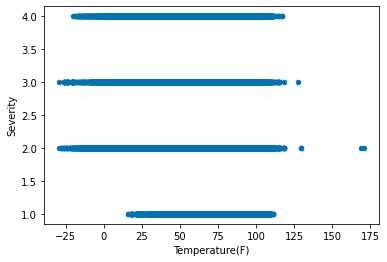

In [48]:
df.plot(kind='scatter', x='Temperature(F)', y='Severity')
pass

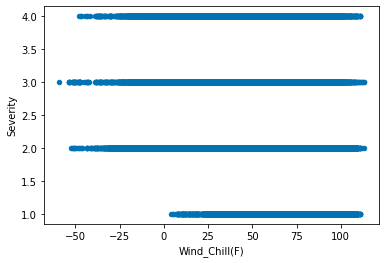

In [49]:
df.plot(kind='scatter', x='Wind_Chill(F)', y='Severity')
pass

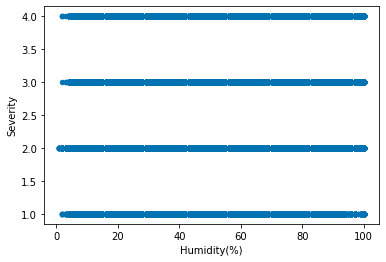

In [50]:
df.plot(kind='scatter', x='Humidity(%)', y='Severity')
pass

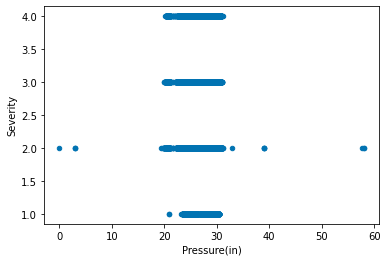

In [51]:
df.plot(kind='scatter', x='Pressure(in)', y='Severity')
pass

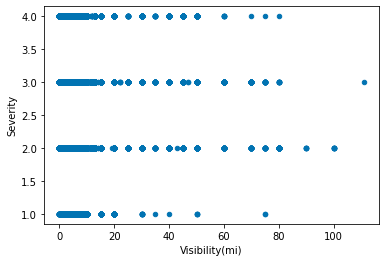

In [52]:
df.plot(kind='scatter', x='Visibility(mi)', y='Severity')
pass

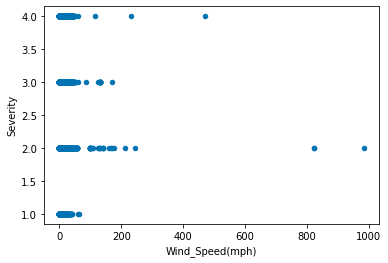

In [53]:
df.plot(kind='scatter', x='Wind_Speed(mph)', y='Severity')
pass

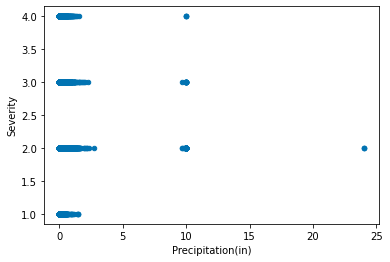

In [54]:
df.plot(kind='scatter', x='Precipitation(in)', y='Severity')
pass

Можно воспользоваться эвристическим правилом, что все примеры за границами интервала $[Q_1-1.5\cdot{\rm IQR},\, Q_3+1.5\cdot{\rm IQR}]$ являются выбросами.

In [55]:
checks = ['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']

for c in checks:
  Q1, Q3 = df[c].quantile([.25, .75])
  IQR = Q3 - Q1
  values_lower = Q1 - 1.5*IQR
  values_upper = Q3 + 1.5*IQR
  rows_to_drop = df[
    (df[c] < values_lower) | (df[c] > values_upper)].index
  df = df.drop(rows_to_drop)

In [56]:
df.shape

(940900, 44)

Теперь посмотрим, где вообще и какие происходили аварии

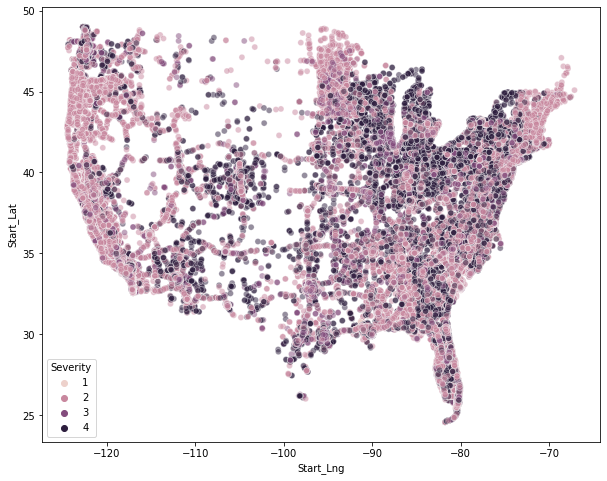

In [57]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x='Start_Lng', y='Start_Lat', hue='Severity', data=df, alpha=0.5)
pass

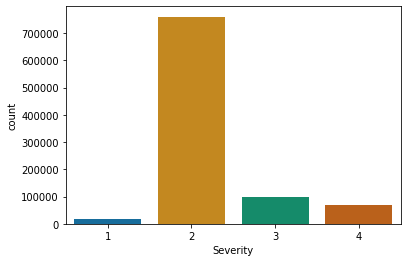

In [58]:
sns.countplot(x='Severity', data=df)
pass

Построим все возможные диаграммы рассеивания для каждой пары количественных переменных:

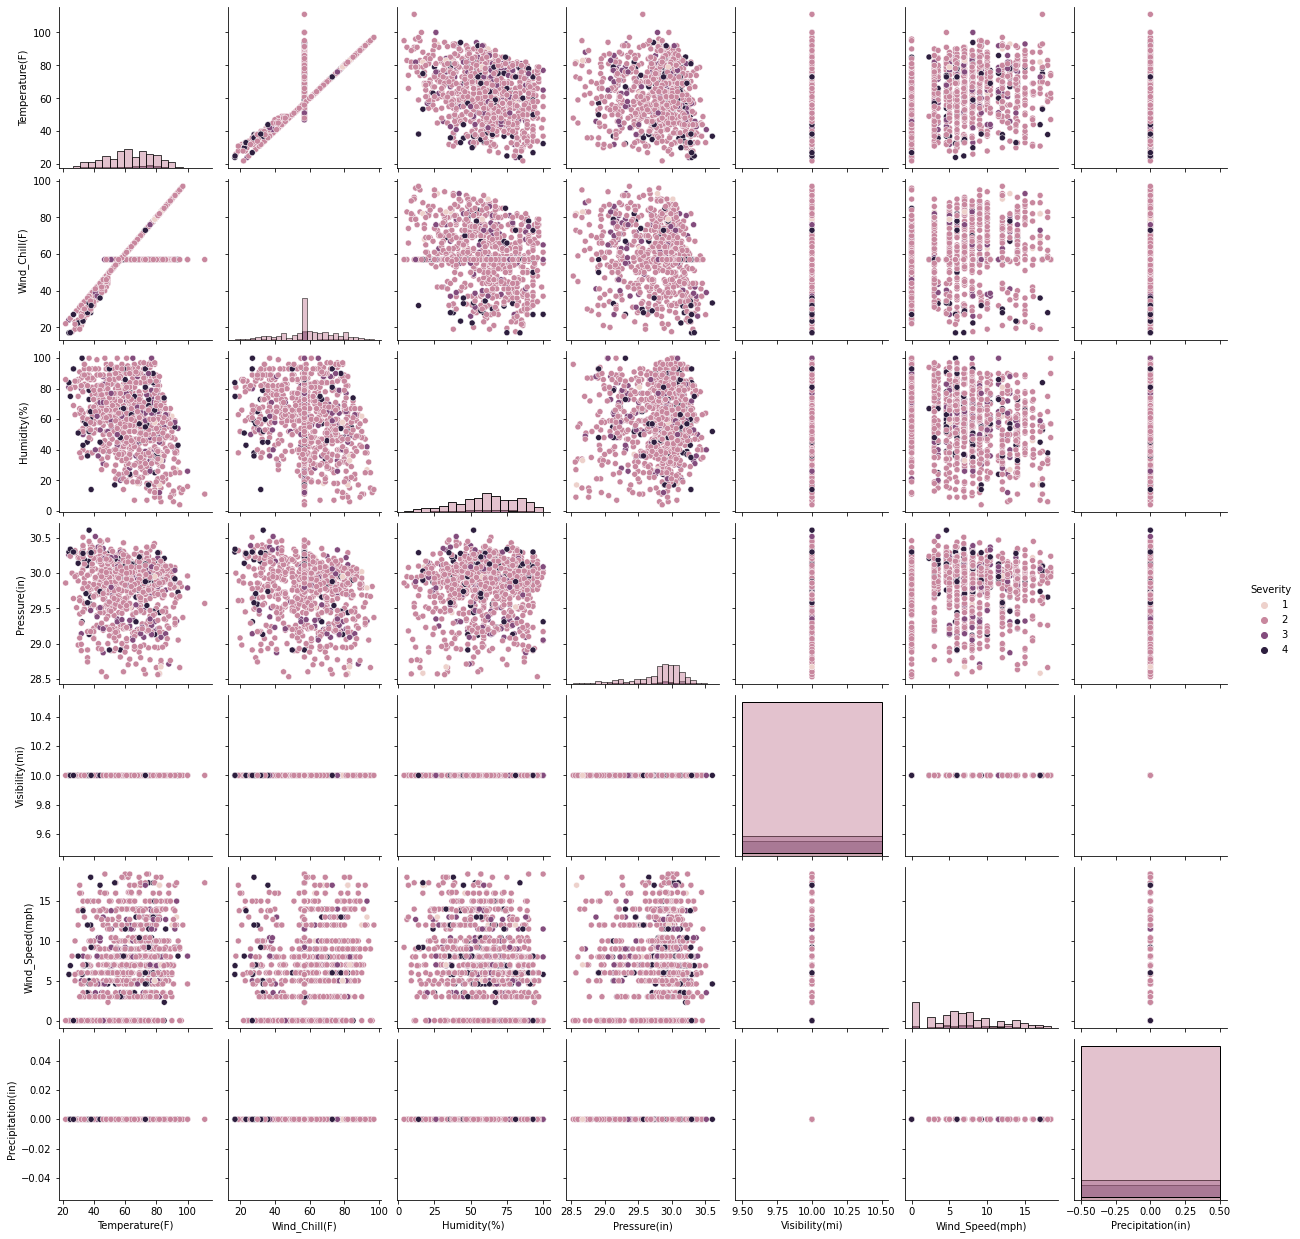

In [59]:
sns.pairplot(df[['Severity', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']].sample(1000), hue='Severity', diag_kind='hist')
pass

In [60]:
df.dtypes

Severity                          int64
Start_Time               datetime64[ns]
Start_Lat                       float64
Start_Lng                       float64
Side                           category
Timezone                       category
Weather_Timestamp        datetime64[ns]
Temperature(F)                  float64
Wind_Chill(F)                   float64
Humidity(%)                     float64
Pressure(in)                    float64
Visibility(mi)                  float64
Wind_Direction                 category
Wind_Speed(mph)                 float64
Precipitation(in)               float64
Amenity                            bool
Bump                               bool
Crossing                           bool
Give_Way                           bool
Junction                           bool
No_Exit                            bool
Railway                            bool
Roundabout                         bool
Station                            bool
Stop                               bool


In [61]:
cat_features = ['Side','Timezone','Wind_Direction', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='if_binary', sparse=False)
enc.fit(df[cat_features])

OneHotEncoder(drop='if_binary', sparse=False)

In [62]:
dummies = pd.DataFrame(enc.transform(df[cat_features]), 
                       columns=enc.get_feature_names_out(), index=df.index)
dummies.head()

,Side_R,Timezone_US/Central,Timezone_US/Eastern,Timezone_US/Mountain,Timezone_US/Pacific,Wind_Direction_CALM,Wind_Direction_E,Wind_Direction_N,Wind_Direction_S,Wind_Direction_VAR,Wind_Direction_W,Sunrise_Sunset_Night,Civil_Twilight_Night,Nautical_Twilight_Night,Nautical_Twilight_Night,Astronomical_Twilight_Night
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
6,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Добавим эти dummy-столбцы к таблице и удалим исходные столбцы

In [63]:
df = pd.concat((df, dummies), axis=1).drop(cat_features, axis=1)

In [64]:
df.head()

,Severity,Start_Time,Start_Lat,Start_Lng,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),...,Wind_Direction_E,Wind_Direction_N,Wind_Direction_S,Wind_Direction_VAR,Wind_Direction_W,Sunrise_Sunset_Night,Civil_Twilight_Night,Nautical_Twilight_Night,Nautical_Twilight_Night,Astronomical_Twilight_Night
0,3,2016-02-08 00:37:08,40.108910,-83.092860,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
6,2,2016-02-08 08:16:57,39.063240,-84.032430,2016-02-08 08:16:00,35.6,29.2,100.0,29.66,10.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,2,2016-02-08 08:16:57,39.067080,-84.058550,2016-02-08 08:16:00,35.6,29.2,100.0,29.66,10.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10,2,2016-02-08 14:19:57,40.702247,-84.075887,2016-02-08 13:53:00,39.0,31.8,70.0,29.59,10.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13,2,2016-02-08 16:50:57,39.138770,-84.533940,2016-02-08 16:53:00,35.1,32.2,96.0,29.69,10.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Заменим true/false на 1/0


In [65]:
df = df.replace([True, False], [1,0])

In [66]:
df.dtypes

Severity                                int64
Start_Time                     datetime64[ns]
Start_Lat                             float64
Start_Lng                             float64
Weather_Timestamp              datetime64[ns]
Temperature(F)                        float64
Wind_Chill(F)                         float64
Humidity(%)                           float64
Pressure(in)                          float64
Visibility(mi)                        float64
Wind_Speed(mph)                       float64
Precipitation(in)                     float64
Amenity                                 int64
Bump                                    int64
Crossing                                int64
Give_Way                                int64
Junction                                int64
No_Exit                                 int64
Railway                                 int64
Roundabout                              int64
Station                                 int64
Stop                              

Теперь остаётся закодировать время. Раскладываем его на синус и косинус, чтобы показать модели машинного обучения, что время циклчино.

Подробнее: https://ianlondon.github.io/blog/encoding-cyclical-features-24hour-time/


In [67]:
import datetime
seconds_in_day = 24*60*60

df['Start_Time_sin'] = df['Start_Time'].apply(lambda x: np.sin(2*np.pi*datetime.datetime.timestamp(x)/seconds_in_day))
df['Start_Time_cos'] = df['Start_Time'].apply(lambda x: np.cos(2*np.pi*datetime.datetime.timestamp(x)/seconds_in_day))

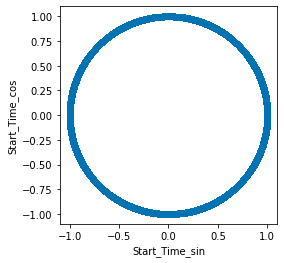

In [68]:
df.plot.scatter('Start_Time_sin','Start_Time_cos').set_aspect('equal');

In [69]:
df = df.drop(["Start_Time"], axis=1)

In [70]:
df['Weather_Timestamp_sin'] = df['Weather_Timestamp'].apply(lambda x: np.sin(2*np.pi*datetime.datetime.timestamp(x)/seconds_in_day))
df['Weather_Timestamp_cos'] = df['Weather_Timestamp'].apply(lambda x: np.cos(2*np.pi*datetime.datetime.timestamp(x)/seconds_in_day))

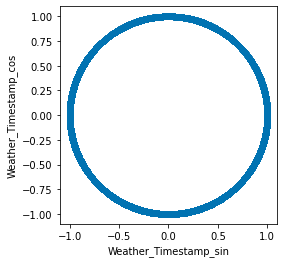

In [71]:
df.plot.scatter('Weather_Timestamp_sin','Weather_Timestamp_cos').set_aspect('equal');

In [72]:
df = df.drop(["Weather_Timestamp"], axis=1)

In [73]:
df.dtypes

Severity                         int64
Start_Lat                      float64
Start_Lng                      float64
Temperature(F)                 float64
Wind_Chill(F)                  float64
Humidity(%)                    float64
Pressure(in)                   float64
Visibility(mi)                 float64
Wind_Speed(mph)                float64
Precipitation(in)              float64
Amenity                          int64
Bump                             int64
Crossing                         int64
Give_Way                         int64
Junction                         int64
No_Exit                          int64
Railway                          int64
Roundabout                       int64
Station                          int64
Stop                             int64
Traffic_Calming                  int64
Traffic_Signal                   int64
Clear                            int64
Cloud                            int64
Rain                             int64
Heavy_Rain               

In [74]:
duplicate_columns = df.columns[df.columns.duplicated()]
duplicate_columns

Index(['Nautical_Twilight_Night'], dtype='object')

Каким-то образом получилось, что столбец `Nautical_Twilight_Night` задвоился. Удалим лишний 

In [75]:
df = df.loc[:,~df.columns.duplicated()]

Разбиваем выборку на обучающую и тестовую части. Целевой переменной будет `Severity`.

In [76]:
X = df.drop(['Severity'], axis=1)
y = df[['Severity']]

In [77]:
X

,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,...,Wind_Direction_VAR,Wind_Direction_W,Sunrise_Sunset_Night,Civil_Twilight_Night,Nautical_Twilight_Night,Astronomical_Twilight_Night,Start_Time_sin,Start_Time_cos,Weather_Timestamp_sin,Weather_Timestamp_cos
0,40.108910,-83.092860,42.1,36.1,58.0,29.76,10.0,10.4,0.0,0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.161317,0.986903,0.229200,0.973379
6,39.063240,-84.032430,35.6,29.2,100.0,29.66,10.0,8.1,0.0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.826713,-0.562625,0.829038,-0.559193
7,39.067080,-84.058550,35.6,29.2,100.0,29.66,10.0,8.1,0.0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.826713,-0.562625,0.829038,-0.559193
10,40.702247,-84.075887,39.0,31.8,70.0,29.59,10.0,11.5,0.0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,-0.573398,-0.819277,-0.473320,-0.880891
13,39.138770,-84.533940,35.1,32.2,96.0,29.69,10.0,3.5,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.954955,-0.296750,-0.957571,-0.288196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516058,34.239104,-118.416176,81.0,81.0,48.0,28.78,10.0,6.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.991225,0.132184,-0.976296,0.216440
1516059,34.002480,-117.379360,86.0,86.0,40.0,28.92,10.0,13.0,0.0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,-0.999889,0.014907,-0.999534,-0.030539
1516060,32.766960,-117.148060,70.0,70.0,73.0,29.39,10.0,6.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.951728,0.306941,-0.973379,0.229200
1516061,33.775450,-117.847790,73.0,73.0,64.0,29.74,10.0,10.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.965529,0.260294,-0.973379,0.229200


In [78]:
y

,Severity
0,3
6,2
7,2
10,2
13,2
...,...
1516058,2
1516059,2
1516060,2
1516061,2


In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

## Решающее дерево (Decision tree)

In [86]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [87]:
y_pred = clf.predict(X_test)

In [88]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8031799341056435


In [89]:
print(metrics.confusion_matrix(y_test, y_pred))

[[  2215   1625    264    209]
 [  1897 168359  12447   7178]
 [   285  11637  10253   2078]
 [   156   6590   1931   8101]]


In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

tree_params = {
    'criterion': ['gini', 'entropy'], # ['gini','entropy', 'log_loss'],
    'max_depth': [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]
}
clf2 = GridSearchCV(clf, tree_params, cv=5)
clf2.fit(X, y)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_message, FitFaile

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150]})

In [91]:
y_pred = clf2.predict(X_test)

In [92]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8236369433521097


In [93]:
print(metrics.confusion_matrix(y_test, y_pred))

[[   516   3729     29     39]
 [   190 187162    876   1653]
 [    18  20765   2917    553]
 [    52  13305    276   3145]]


In [98]:
def plot_search_results(grid):
    """
    Params: 
        grid: A trained GridSearchCV object.
    """
    ## Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    # means_train = results['mean_train_score']
    # stds_train = results['std_train_score']

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        # y_2 = np.array(means_train[best_index])
        # e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        # ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()

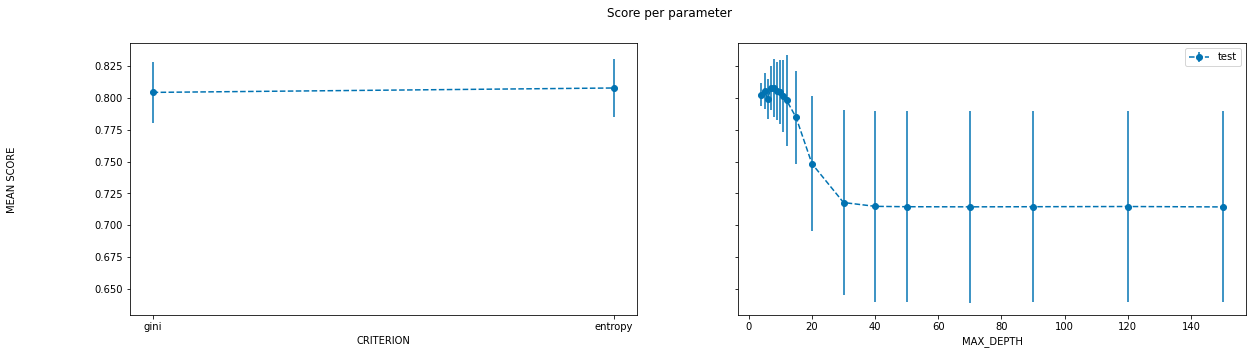

In [99]:
plot_search_results(clf2)

## Градиентный бустинг (Gradient boosting)

In [ ]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(objective='multi:softmax', eval_metric=['merror','mlogloss'], seed=42)
xgb_clf.fit(X_train, 
            y_train,
            verbose=0,
            eval_set=[(X_train, y_train), (X_test, y_test)])

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(eval_metric=['merror', 'mlogloss'], objective='multi:softprob',
              seed=42)

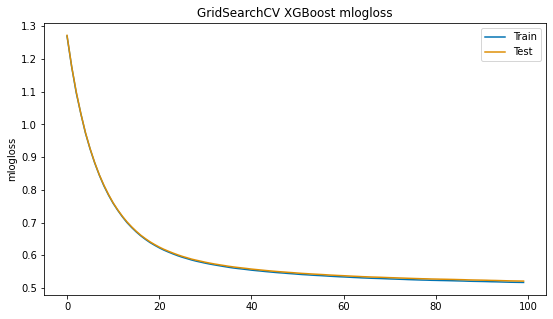

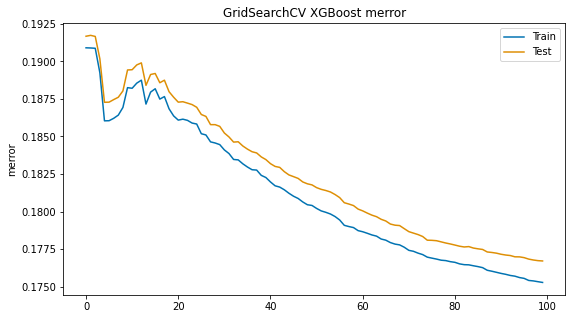

In [ ]:
# preparing evaluation metric plots
results = xgb_clf.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

# xgboost 'mlogloss' plot
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
plt.ylabel('mlogloss')
plt.title('GridSearchCV XGBoost mlogloss')
plt.show()

# xgboost 'merror' plot
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
plt.ylabel('merror')
plt.title('GridSearchCV XGBoost merror')
plt.show()

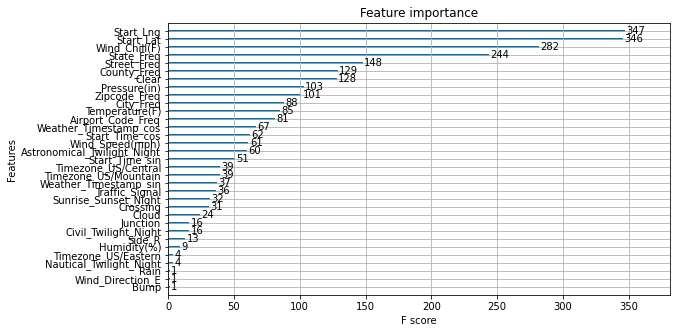

In [ ]:
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(9,5))
plot_importance(xgb_clf, ax=ax)
plt.show()

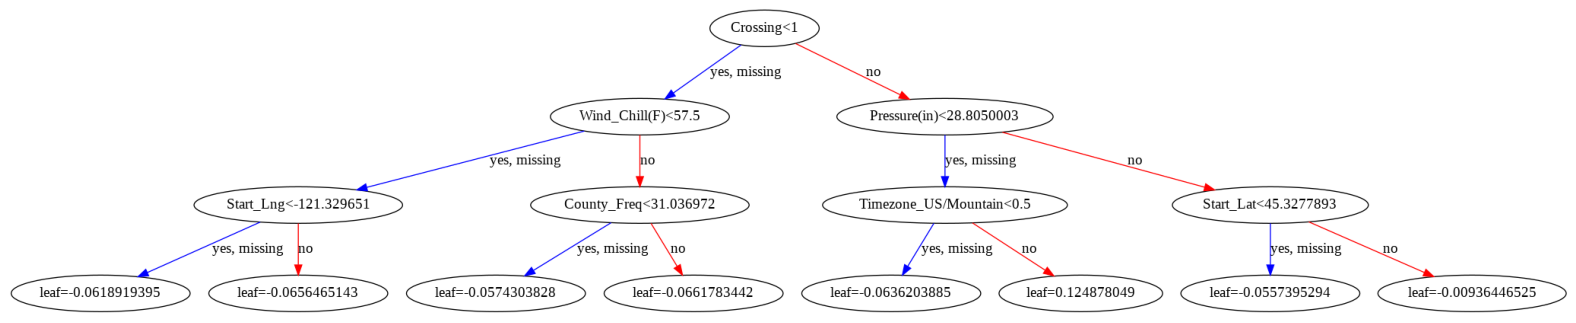

In [ ]:
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 28,12
xgb.plot_tree(xgb_clf)
plt.show()

In [ ]:
y_pred = xgb_clf.predict(X_test)

In [ ]:
print('Accuracy: {:.6f}'.format(metrics.accuracy_score(y_test, y_pred)))

Accuracy: 0.823284


In [ ]:
print(metrics.confusion_matrix(y_test, y_pred))

[[   362   3923     18     10]
 [    81 188036    853    911]
 [     6  21280   2554    413]
 [    28  13847    198   2705]]


## Линейный дискриминантный анализ

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
ldaclf = LinearDiscriminantAnalysis()
ldaclf.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis()

In [ ]:
y_pred = ldaclf.predict(X_test)

In [ ]:
print('Accuracy: {:.6f}'.format(metrics.accuracy_score(y_test, y_pred)))

Accuracy: 0.801509


In [ ]:
print(metrics.confusion_matrix(y_test, y_pred))

[[   604   3691     18      0]
 [  1114 185881   2472    414]
 [   211  22361   1563    118]
 [   191  15750    350    487]]


## Выводы

Результаты примерно одинаковы: accuracy 80-82%. Во всех трёх случаях видно, что очень много ошибок из-за того, что результаты классифицируются, как второй класс аварий. Для исправления труебуется сбалансировать классы. 